## HW1: Logistic regression and Linear Regression using Gradient Descent
In hw1, you need to implement linear regression by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get no points by simply calling sklearn.linear_model.LinearRegression

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# Part 1. Linear regression model

## Load regression data

In [2]:
x_train, x_test, y_train, y_test = np.load('regression_data.npy', allow_pickle=True)

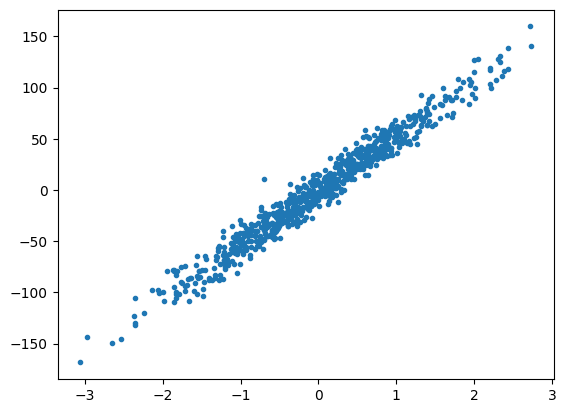

In [3]:
plt.plot(x_train, y_train, '.')

## Train your model 
### Pseudo code:
1. Random initialize the weights, intercepts of the linear model

**for i in range(iteration)**

    2. Feed foward the training data into the model, get the output prediction
    3. Calculating training loss by Mean Square Error of predcition and ground truth data
    4. Calculating the gradients
    5. Updating the weights and intercepts by the gradients * learning rate 
    
**End of training**

In [4]:
#1
weights = np.random.randn()
intercepts = np.random.randn()
#hyperparameter
learning_rate = 0.05
iteration = 500
#p2
MSE = []

In [5]:
#2~5
for i in range(iteration):
    diff_weights = 0
    diff_intercepts = 0
    loss = 0
    for j in range(len(x_train)):
        #2
        y_pred = intercepts + weights * x_train[j]
        #3
        loss += (y_train[j] - y_pred)**2
        #4
        diff_intercepts -= (y_train[j] - y_pred)
        diff_weights -= x_train[j] * (y_train[j] - y_pred)
    #p2
    MSE.append(loss / len(x_train))
    #5
    intercepts = intercepts - learning_rate * (diff_intercepts / len(x_train))
    weights = weights - learning_rate * (diff_weights / len(x_train))

## Test the performance on the testing data
Inference the test data (x_test) by your model and calculate the loss of (y_test, y_pred)

In [6]:
#Test
y_pred = intercepts + weights * x_test
Mean_square_error = 0
for test, pred in zip(y_test, y_pred):
    Mean_square_error += (test - pred)**2
Mean_square_error /= len(y_test)
print(Mean_square_error)

[110.43819255]


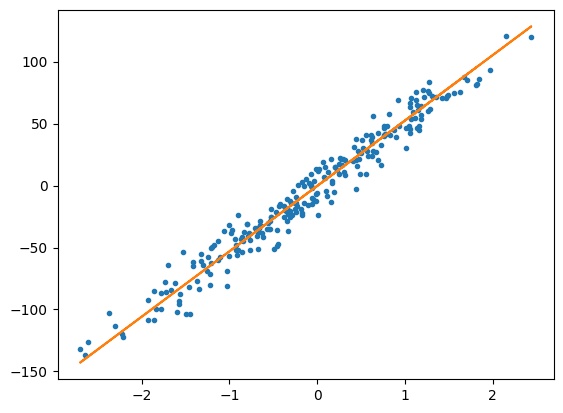

In [7]:
plt.plot(x_test, y_test, '.')
plt.plot(x_test, y_pred)

Mean_square_error: [110.43819255]
weights: [52.74354046], intercepts: [-0.3337589]


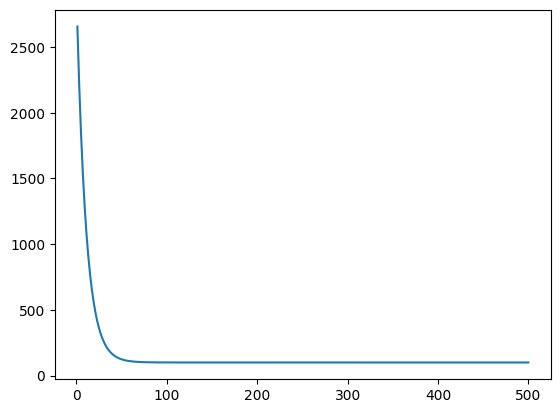

In [8]:
#Ans
plt.plot(np.arange(1, len(MSE) + 1), MSE)
print(f'Mean_square_error: {Mean_square_error}')
#y = intercapts + weights * x
print(f'weights: {weights}, intercepts: {intercepts}')

# Part 2. Logistic regreesion model

## Load classification data

In [9]:
x_train, x_test, y_train, y_test = np.load('classification_data.npy', allow_pickle=True)

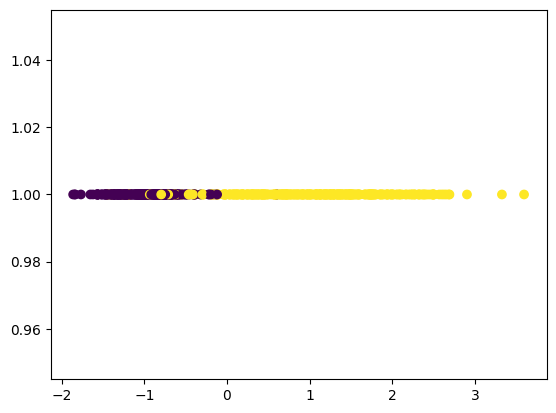

In [10]:
plt.scatter(x_train, np.ones_like(x_train), c=y_train)

In [11]:
#1
weights = np.random.randn()
intercepts = np.random.randn()
#hyperparameter
learning_rate = 0.0005
iteration = 500
#p2
CEE = []

In [12]:
#2~5
for i in range(iteration):
    diff_weights = 0
    diff_intercepts = 0
    loss = 0
    for j in range(len(x_train)):
        #2
        x = intercepts + weights * x_train[j]
        y_pred = 1 / (1 + np.exp(-x))
        #3
        loss -= y_train[j] * np.log(y_pred) + (1 - y_train[j]) * np.log(1 - y_pred)
        #4
        diff_intercepts -= (y_train[j] - y_pred)
        diff_weights -= x_train[j] * (y_train[j] - y_pred)
    #p2
    CEE.append(loss)
    #5
    intercepts = intercepts - learning_rate * (diff_intercepts)
    weights = weights - learning_rate * (diff_weights)

In [13]:
#Test
Cross_entropy_error = 0
for j in range(len(x_test)):
    x = intercepts + weights * x_test[j]
    y_pred = 1 / (1 + np.exp(-x))
    Cross_entropy_error -= y_test[j] * np.log(y_pred) + (1 - y_test[j]) * np.log(1 - y_pred)
print(Cross_entropy_error)

[45.69130759]


Cross Entropy Error: [45.69130759]
weights: [4.34510084], intercepts: [1.38894518]


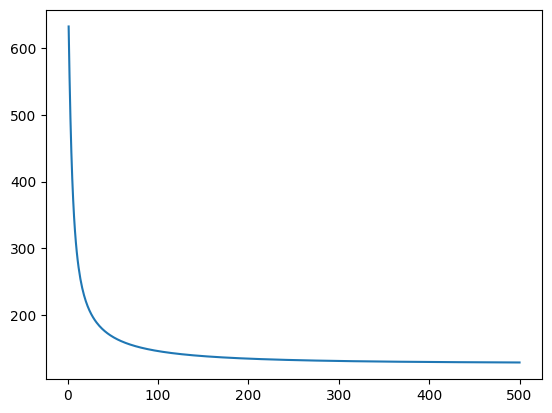

In [14]:
#Ans
plt.plot(np.arange(1, len(CEE) + 1), CEE)
print(f'Cross Entropy Error: {Cross_entropy_error}')
#y = intercapts + weights * x
print(f'weights: {weights}, intercepts: {intercepts}')